In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import pandas as pd
#upload experiment data from 
#Nan etc High-resolution model of complexly shaped bodies motion using an IBM-VOF-DEM coupling method

data = pd.read_csv('data/plot-data-sphere.csv')
velocity = pd.read_csv('data/plot-data-velocity.csv')
pos = pd.read_csv('data/plot-data_position_new.csv')

&#x2705; mesh refinement parameters : 
- 0: 3000 (10 10 30)
- 1: 24000 (20 20 60)
- 2: 81000 (30 30 90), 
- 3: 192000 (40 40 120)
- 4: 648000 (60 60 180)
- 5: 1536000 (80 80 240)

In [2]:
#load particles for different meshes

def load_particle_data(directories):
    for directory in directories:
        dir_str = str(directory)
        globals()[f'par1_{dir_str}'] = np.loadtxt(f'data/{dir_str}/position_particle_1.txt')
        globals()[f'par1vel_{dir_str}'] = np.loadtxt(f'data/{dir_str}/velocity_particle_1.txt')

# Usage:
directories = [0, 1, 2, 3, 4, 5]
load_particle_data(directories)

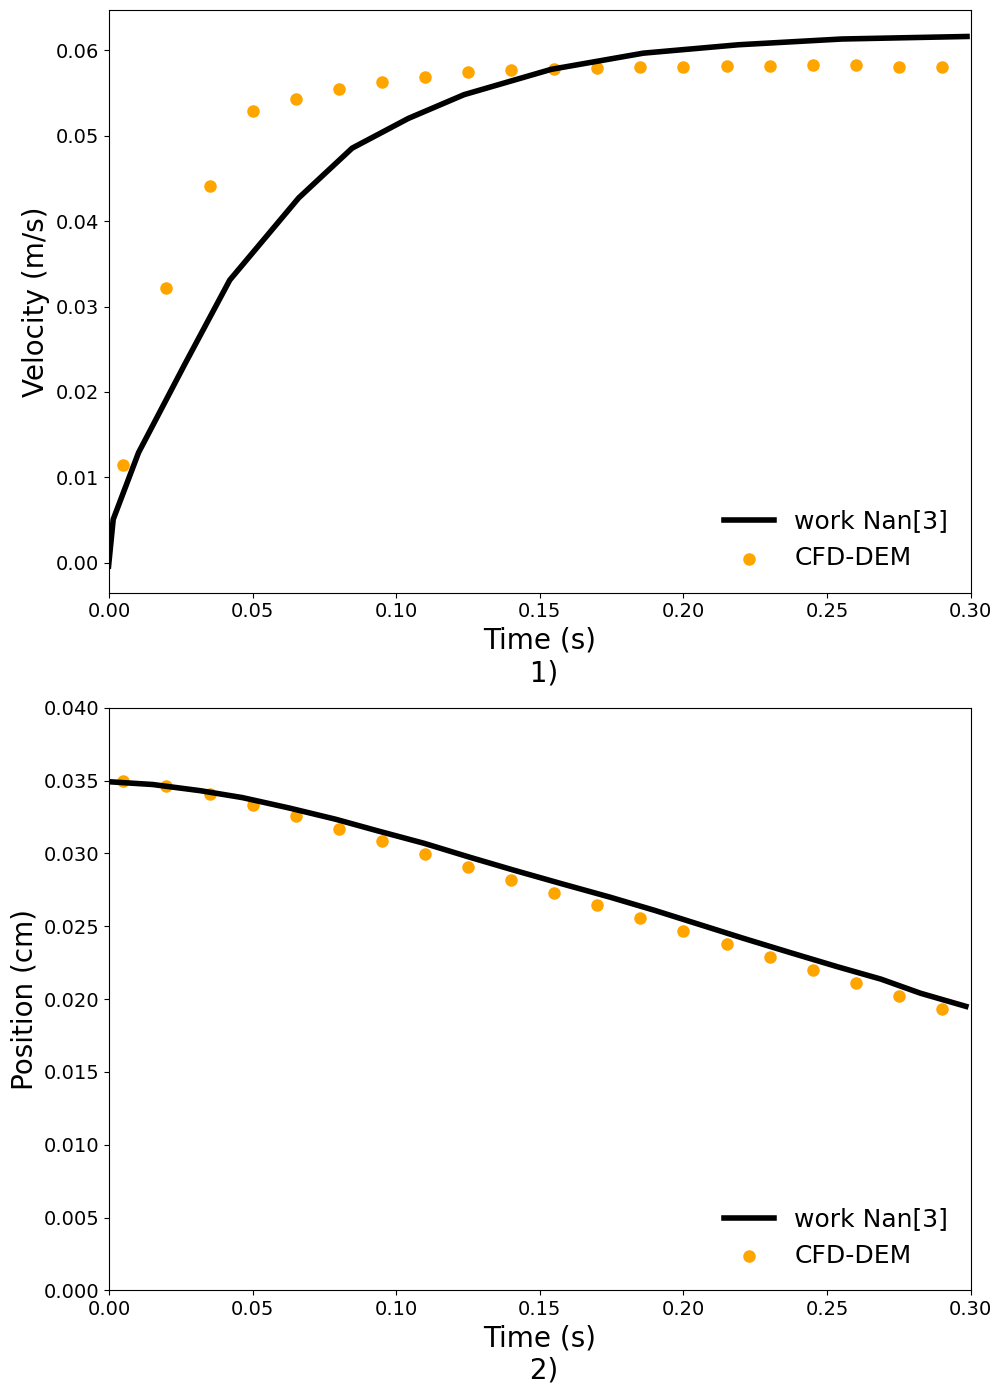

In [4]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 15))
#fig.suptitle('different exchange time for coupling!')
linienstaerke = 4
MarkerGroesse = 8


ax1.scatter(par1vel_3[:600:3, 0], np.sqrt(par1vel_3[:600:3, 1]**2 + par1vel_3[:600:3, 2]**2 + par1vel_3[:600:3, 3]**2), color='orange', s=MarkerGroesse**2, label =  'CFD-DEM')#label='648000 cells')
ax1.plot(velocity['x'],velocity[' y'],'-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse, label='work Nan[3]')
ax1.set_xlabel('Time (s)\n 1)', fontsize = 20)
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)', fontsize = 20)
ax1.tick_params(axis='both',labelsize = 14)
ax1.legend(loc='lower right', frameon=False, fontsize = 18)


ax2.scatter(par1_3[:700:3, 0], par1_3[:700:3, 3], color='orange', s=MarkerGroesse**2, label='CFD-DEM')#'648000 cells')
ax2.plot(pos['x'],pos[' y'], '-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse, label='work Nan(2023)')
ax2.set_xlabel('Time (s)\n 2)', fontsize = 20)
ax2.set_ylabel('Position (cm)', fontsize =20)
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.tick_params(axis='both',labelsize = 14)
ax2.legend(loc='lower right',frameon=False, fontsize = 18)
#fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

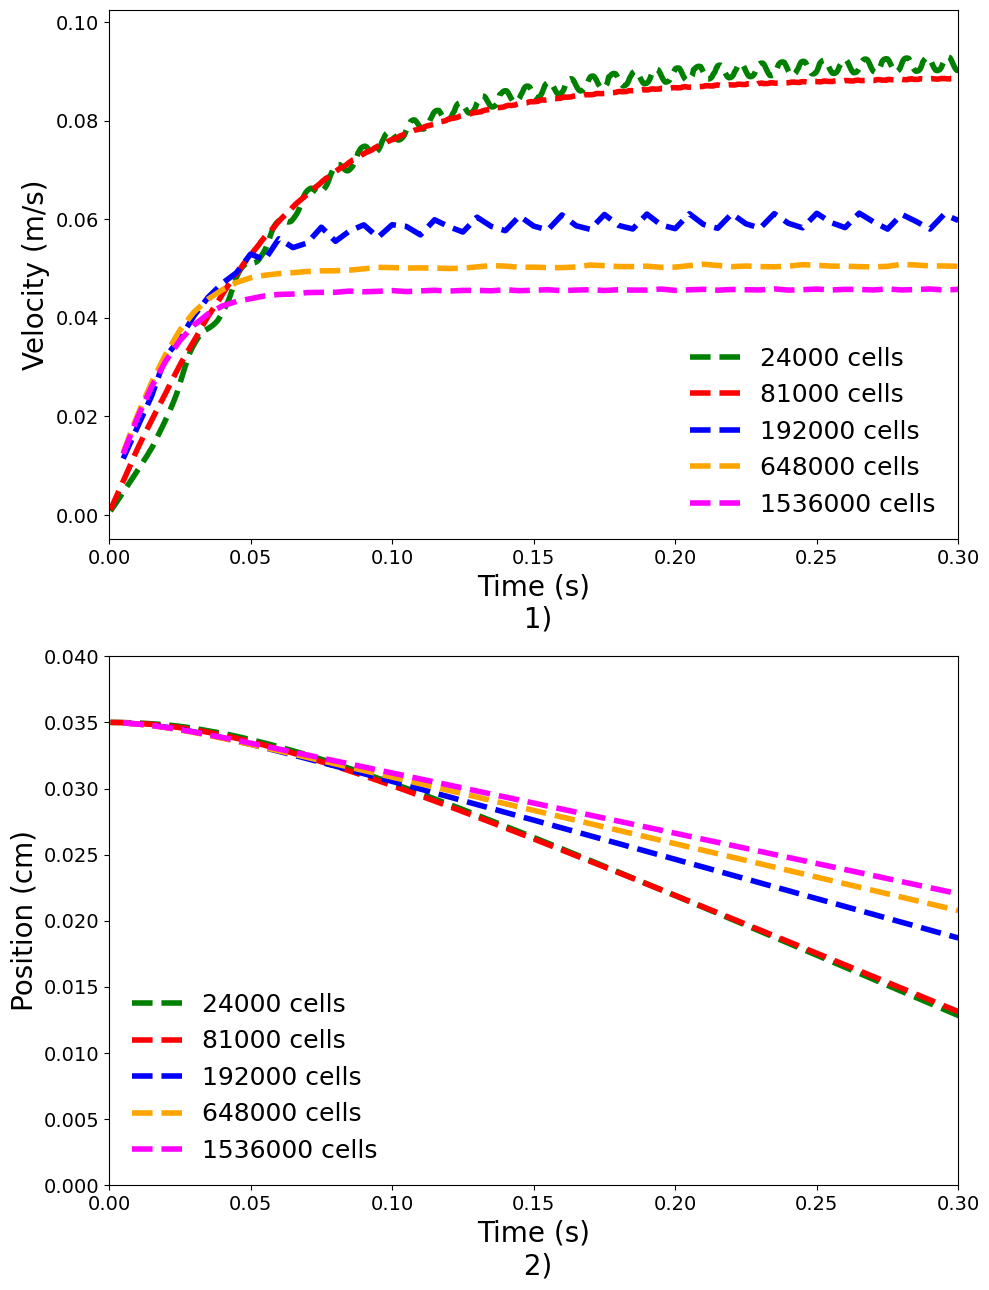

In [5]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 15))
#fig.suptitle('Simulation 192000 cells for different cells amount')
linienstaerke = 4
MarkerGroesse = 8


#ax1.plot(par1vel_0[:,0][:600], np.sqrt(par1vel_0[:, 1]**2 + par1vel_0[:, 2]**2 + par1vel_0[:, 3]**2)[:600], '--',color = 'black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.plot(par1vel_1[:,0], np.sqrt(par1vel_1[:, 1]**2 + par1vel_1[:, 2]**2 + par1vel_1[:, 3]**2), '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='24000 cells')
ax1.plot(par1vel_2[:,0], np.sqrt(par1vel_2[:, 1]**2 + par1vel_2[:, 2]**2 + par1vel_2[:, 3]**2), '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='81000 cells')
ax1.plot(par1vel_3[:,0], np.sqrt(par1vel_3[:, 1]**2 + par1vel_3[:, 2]**2 + par1vel_3[:, 3]**2), '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='192000 cells')
ax1.plot(par1vel_4[:,0], np.sqrt(par1vel_4[:, 1]**2 + par1vel_4[:, 2]**2 + par1vel_4[:, 3]**2), '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='648000 cells')
ax1.plot(par1vel_5[:,0], np.sqrt(par1vel_5[:, 1]**2 + par1vel_5[:, 2]**2 + par1vel_5[:, 3]**2)[:600], '--',color = 'magenta',linewidth=linienstaerke, markersize=MarkerGroesse,label='1536000 cells')
ax1.set_xlabel('Time (s)\n 1)',fontsize=20)
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)',fontsize=20)
ax1.legend(loc='lower right', frameon=False,fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)


#ax2.plot(par1_0[:, 0][:700],par1_0[:, 3][:700], '--',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.plot(par1_1[:, 0],par1_1[:, 3], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='24000 cells')
ax2.plot(par1_2[:, 0],par1_2[:, 3], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='81000 cells')
ax2.plot(par1_3[:, 0],par1_3[:, 3], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='192000 cells')
ax2.plot(par1_4[:, 0],par1_4[:, 3], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='648000 cells')
ax2.plot(par1_5[:, 0],par1_5[:, 3], '--',color ='magenta',linewidth=linienstaerke, markersize=MarkerGroesse,label='1536000 cells')
ax2.set_xlabel('Time (s)\n 2)',fontsize=20)
ax2.set_ylabel('Position (cm)',fontsize=20)
ax2.legend(loc='lower left', frameon=False,fontsize=18)
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
ax2.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig('nan_simulation_192000_diff_cells_number.png')
#fig.text(0.5, 0.02,'we got rid of calculation for 3000 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

In [6]:
# different dt

def load_particle_data_timestep(directories):
    for directory in directories:
        dir_str = str(directory)
        globals()[f'par2_ts_{dir_str}'] = np.loadtxt(f'data/exchange_time/{dir_str}/position_particle_1.txt')
        globals()[f'par2vel_ts_{dir_str}'] = np.loadtxt(f'data/exchange_time/{dir_str}/velocity_particle_1.txt')

# Usage:
directories = [10, 6, 8,4, 2, 1]
load_particle_data_timestep(directories)

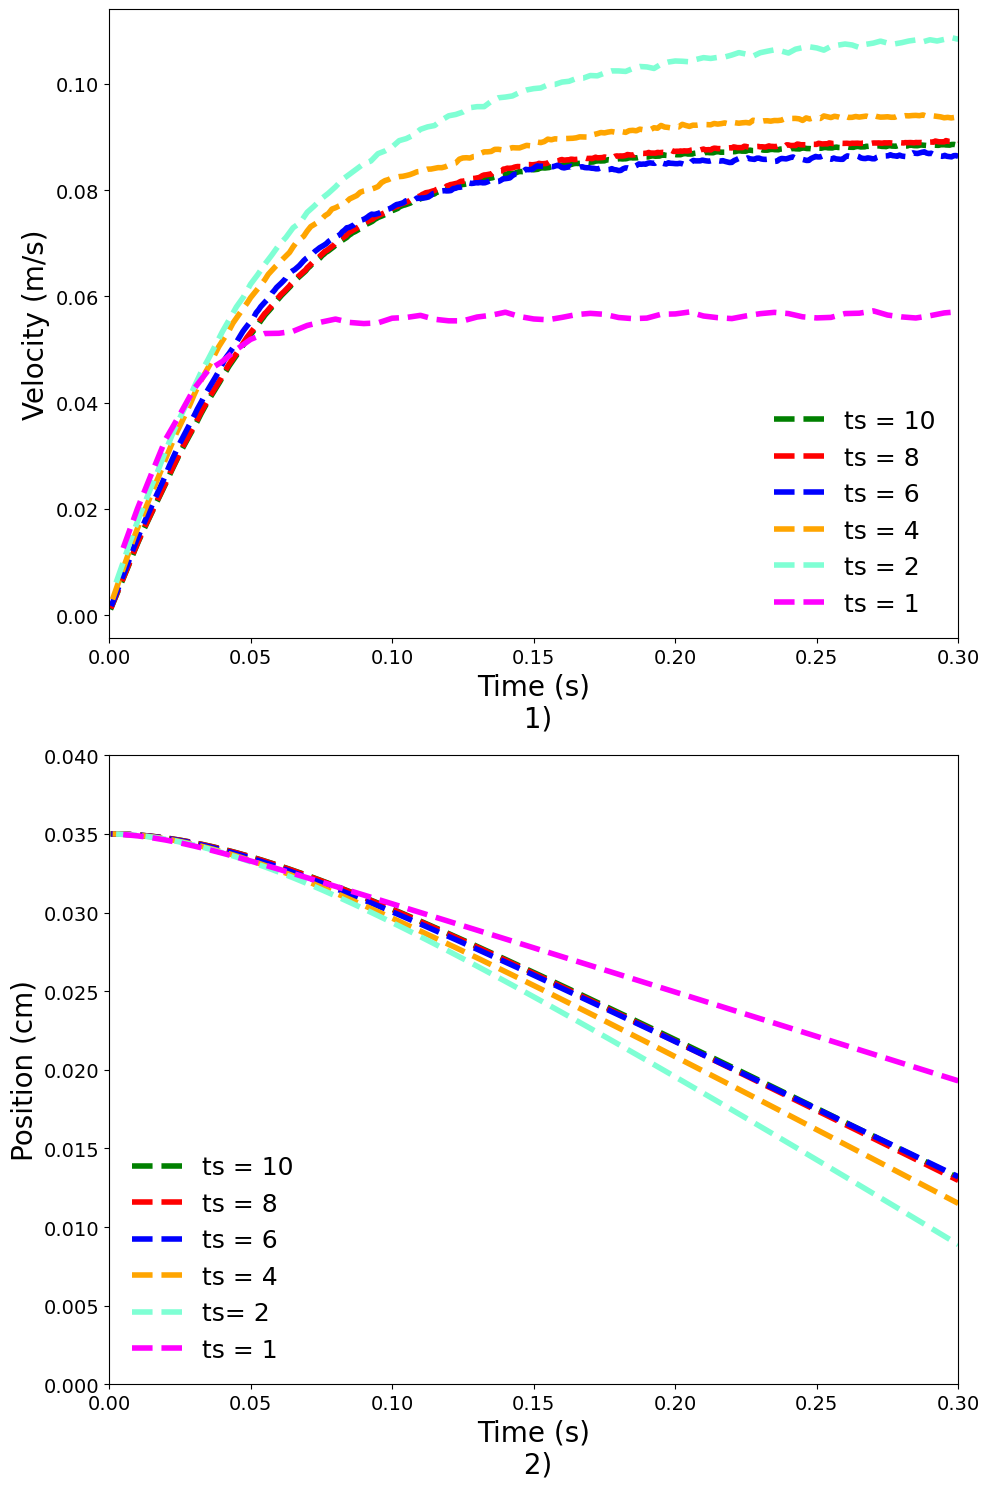

In [7]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 15))
#fig.suptitle('different exchange time for coupling!')

ax1.plot(par2vel_ts_10[:,0][:], np.sqrt(par2vel_ts_10[:, 1]**2 + par2vel_ts_10[:, 2]**2 + par2vel_ts_10[:, 3]**2)[:], '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax1.plot(par2vel_ts_8[:,0][:600], np.sqrt(par2vel_ts_8[:, 1]**2 + par2vel_ts_8[:, 2]**2 + par2vel_ts_8[:, 3]**2)[:600], '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax1.plot(par2vel_ts_6[:,0][:600], np.sqrt(par2vel_ts_6[:, 1]**2 + par2vel_ts_6[:, 2]**2 + par2vel_ts_6[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='ts = 6')
ax1.plot(par2vel_ts_4[:,0][:600], np.sqrt(par2vel_ts_4[:, 1]**2 + par2vel_ts_4[:, 2]**2 + par2vel_ts_4[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse, label='ts = 4')
ax1.plot(par2vel_ts_2[:,0][:600], np.sqrt(par2vel_ts_2[:, 1]**2 + par2vel_ts_2[:, 2]**2 + par2vel_ts_2[:, 3]**2)[:600], '--',color = 'aquamarine',linewidth=linienstaerke, markersize=MarkerGroesse, label='ts = 2')   
ax1.plot(par2vel_ts_1[:,0][:600], np.sqrt(par2vel_ts_1[:, 1]**2 + par2vel_ts_1[:, 2]**2 + par2vel_ts_1[:, 3]**2)[:600], '--',color = 'magenta',linewidth=linienstaerke, markersize=MarkerGroesse, label='ts = 1')
#ax1.plot(velocity['x'],velocity[' y'],'-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.set_xlabel('Time (s)\n 1)',fontsize=20)
ax1.set_xlim([0, 0.3])
ax1.set_ylabel('Velocity (m/s)',fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(loc='lower right', frameon=False, fontsize=18)



ax2.plot(par2_ts_10[:, 0][:],par2_ts_10[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 10')
ax2.plot(par2_ts_8[:, 0][:700],par2_ts_8[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 8')
ax2.plot(par2_ts_6[:, 0][:700],par2_ts_6[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 6')
ax2.plot(par2_ts_4[:, 0][:700],par2_ts_4[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 4')
ax2.plot(par2_ts_2[:, 0][:700],par2_ts_2[:, 3][:700], '--',color ='aquamarine',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts= 2')
ax2.plot(par2_ts_1[:, 0][:700],par2_ts_1[:, 3][:700], '--',color ='magenta',linewidth=linienstaerke, markersize=MarkerGroesse,label='ts = 1')
#ax2.plot(pos['x'],pos[' y'], '-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.set_xlabel('Time (s)\n 2)',fontsize=20)
ax2.set_ylabel('Position (cm)',fontsize=20)
ax2.set_xlim([0, 0.3])
ax2.set_ylim([0, 0.04])
ax2.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
ax2.legend(loc='lower left', frameon=False,fontsize=18)
fig.savefig('nan_simulation_192000_diff_exchange_time.png')
#fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

In [8]:
par2_000001 = np.loadtxt('data/2_000001/position_particle_1.txt')
par2vel_000001 = np.loadtxt('data/2_000001/velocity_particle_1.txt')
par2_000005 = np.loadtxt('data/2_000005/position_particle_1.txt')
par2vel_000005 = np.loadtxt('data/2_000005/velocity_particle_1.txt')
par2_00005 = np.loadtxt('data/2_00005/position_particle_1.txt')
par2vel_00005 = np.loadtxt('data/2_00005/velocity_particle_1.txt')
par2_00005_ts_1 = np.loadtxt('data/2_00005_exchange_time_every_step/position_particle_1.txt')
par2vel_00005_ts_1 = np.loadtxt('data/2_00005_exchange_time_every_step/velocity_particle_1.txt')
par2_0005 = np.loadtxt('data/2_0005/position_particle_1.txt')
par2vel_0005 = np.loadtxt('data/2_0005/velocity_particle_1.txt')

par2vel_000001 = par2vel_000001[::5]
par2vel_00005_ts_1= par2vel_00005_ts_1[::2]

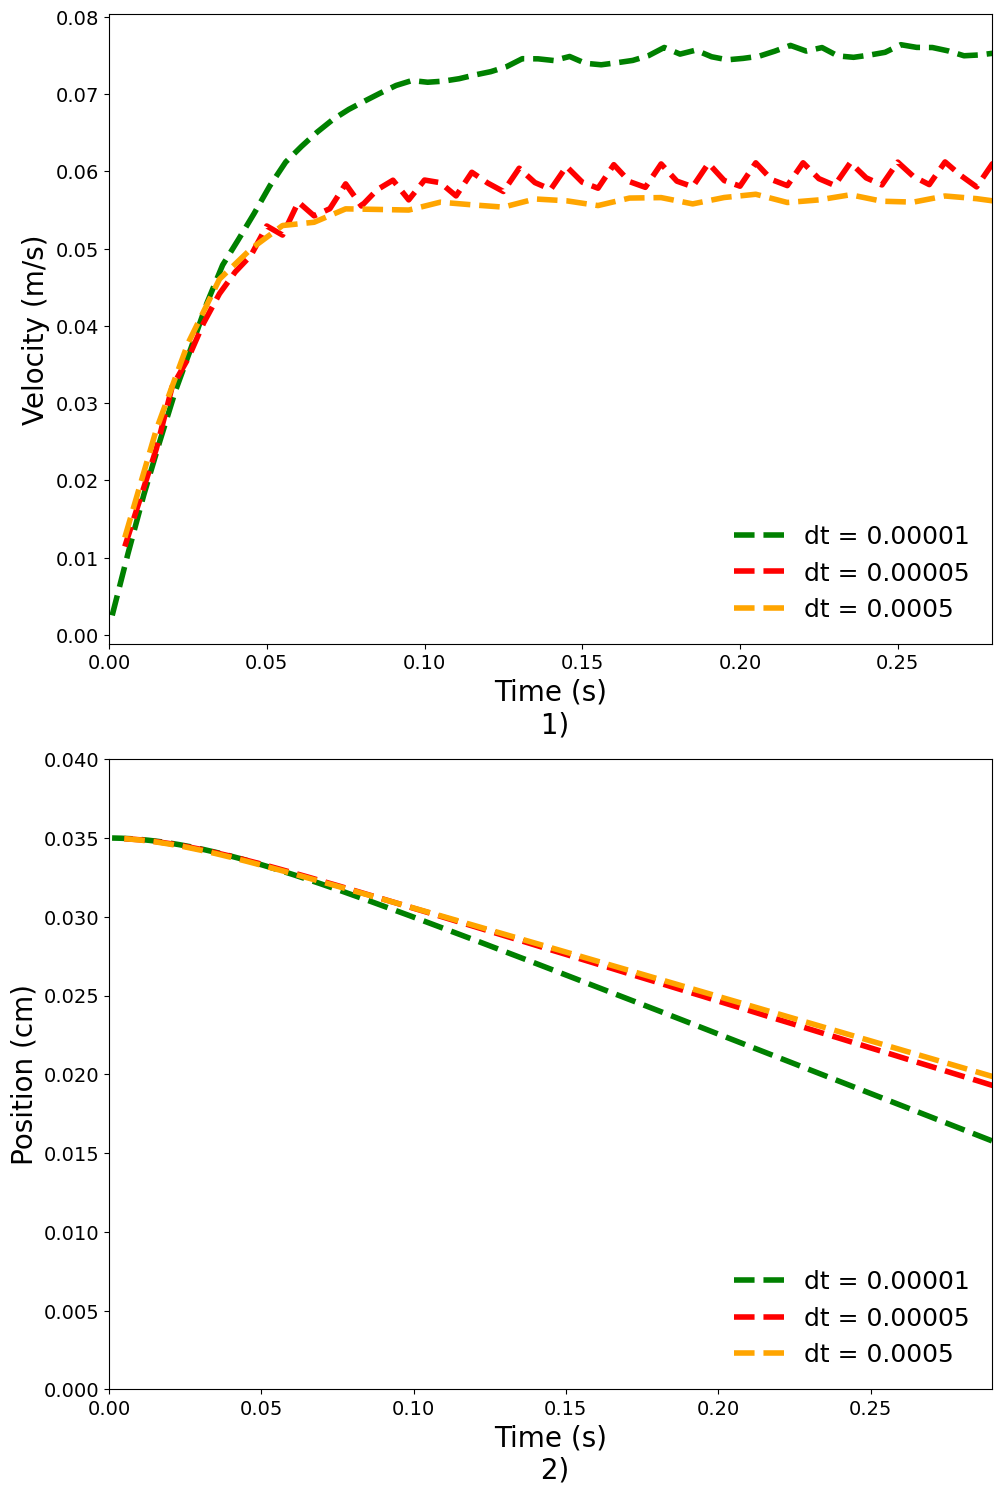

In [9]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 15))
#fig.suptitle('different dt, for 192000 cells ')

ax1.plot(par2vel_000001[:,0], np.sqrt(par2vel_000001[:, 1]**2 + par2vel_000001[:, 2]**2 + par2vel_000001[:, 3]**2), '--',color = 'green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax1.plot(par1vel_3[:,0], np.sqrt(par1vel_3[:, 1]**2 + par1vel_3[:, 2]**2 + par1vel_3[:, 3]**2), '--',color = 'red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
#ax1.plot(par2vel_00005[:,0][:600], np.sqrt(par2vel_00005[:, 1]**2 + par2vel_00005[:, 2]**2 + par2vel_00005[:, 3]**2)[:600], '--',color = 'blue',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.0005')
ax1.plot(par2vel_00005_ts_1[:,0], np.sqrt(par2vel_00005_ts_1[:, 1]**2 + par2vel_00005_ts_1[:, 2]**2 + par2vel_00005_ts_1[:, 3]**2), '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.0005')
#ax1.plot(par2vel_0005[:,0][:600], np.sqrt(par2vel_0005[:, 1]**2 + par2vel_0005[:, 2]**2 + par2vel_0005[:, 3]**2)[:600], '--',color = 'orange',linewidth=linienstaerke, markersize=MarkerGroesse, label='dt = 0.005')
#ax1.plot(velocity['x'],velocity[' y'],'-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax1.set_xlabel('Time (s)\n 1)',fontsize = 20)
ax1.set_xlim([0, 0.28])
ax1.set_ylabel('Velocity (m/s)', fontsize = 20)
ax1.tick_params(axis='both', labelsize = 14)
ax1.legend(loc='lower right', frameon=False,fontsize = 18)



ax2.plot(par2_000001[:, 0][:],par2_000001[:, 3][:], '--',color ='green',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00001')
ax2.plot(par1_3[:, 0][:700],par1_3[:, 3][:700], '--',color ='red',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.00005')
#ax2.plot(par2_00005[:, 0][:700],par2_00005[:, 3][:700], '--',color ='blue',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
ax2.plot(par2_00005_ts_1[:, 0][:700],par2_00005_ts_1[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse,label='dt = 0.0005')
#ax2.plot(par1_0005[:, 0][:700],par1_0005[:, 3][:700], '--',color ='orange',linewidth=linienstaerke, markersize=MarkerGroesse)
#ax2.plot(pos['x'],pos[' y'], '-',color ='black',linewidth=linienstaerke, markersize=MarkerGroesse)
ax2.set_xlabel('Time (s)\n 2)',fontsize = 20)
ax2.set_ylabel('Position (cm)',fontsize = 20)
ax2.set_xlim([0, 0.29])
ax2.set_ylim([0, 0.04])
fig.tight_layout()
ax2.tick_params(axis='both', labelsize = 14)
ax2.legend(loc='lower right', frameon=False,fontsize = 18)
fig.savefig('nan_simulation_192000_cells_dt_different.png')
#fig.text(0.5, 0.02,'we got rid of calculation for 0.005 cells because of unphysical results', ha='center', va='center', fontsize=12)
plt.show()

## Calculation of norms

In [10]:
par1_1 = par1_1[::10]
par1_2 = par1_2[::10]
par1vel_1 = par1vel_1[::10]
par1vel_2 = par1vel_2[::10]

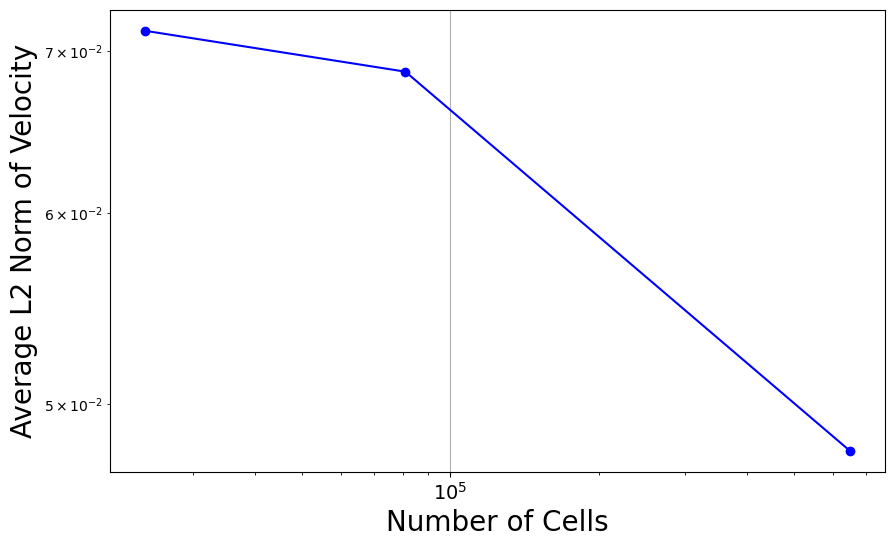

In [11]:


# Function to calculate the L2 norm of velocity vectors
def calculate_l2_norm(velocity_data):
    # Calculating the L2 norm for each time step
    l2_norms = np.sqrt(np.sum(velocity_data[:, 1:]**2, axis=1))
    return l2_norms

# Assuming par1vel_1, par1vel_2, par1vel_3, par1vel_4 are your data arrays
l2_norm_1 = calculate_l2_norm(par1vel_1)
l2_norm_2 = calculate_l2_norm(par1vel_2)
l2_norm_3 = calculate_l2_norm(par1vel_3)
l2_norm_4 = calculate_l2_norm(par1vel_4)

# Now l2_norm_1, l2_norm_2, l2_norm_3, l2_norm_4 contain the L2 norms for each dataset
import matplotlib.pyplot as plt

# Assuming cell_counts is a list or array with the number of cells for each dataset
cell_counts = [24000, 81000, 648000]  # Update this with your actual cell counts

# Calculate the L2 norms for each dataset
l2_norms = [l2_norm_1.mean(), l2_norm_2.mean(),  l2_norm_4.mean()]

# Create the convergence plot
plt.figure(figsize=(10, 6))
plt.loglog(cell_counts, l2_norms, 'o-', color='blue')
plt.xlabel('Number of Cells',fontsize = 20)
plt.ylabel('Average L2 Norm of Velocity',fontsize = 20)
plt.tick_params(axis='both', labelsize = 14)
#plt.title('Convergence Plot')
plt.grid(True)
plt.savefig('l2_norm.png')
plt.show()


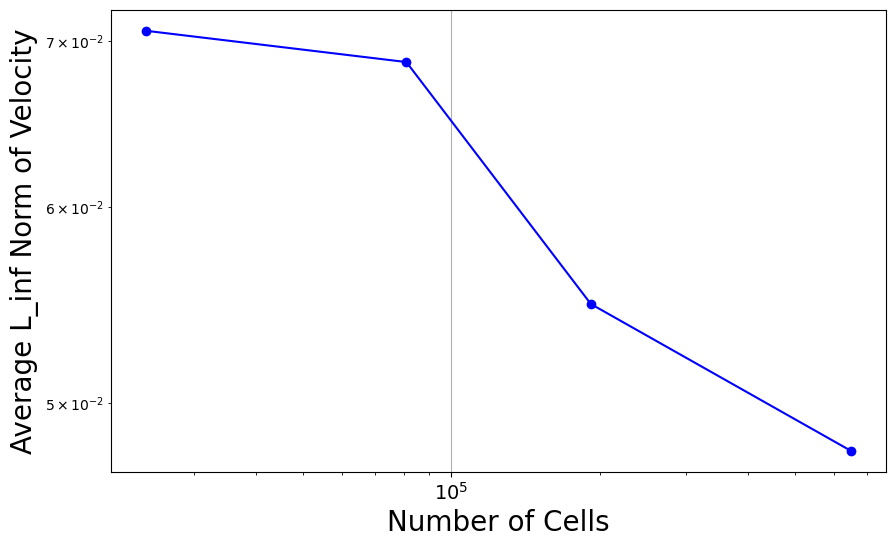

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the presence of velocity data arrays named par1vel_1, par1vel_2, par1vel_3, and par1vel_4
# Here I'm creating dummy data for demonstration, replace these with your actual velocity data arrays
# par1vel_1, par1vel_2, par1vel_3, par1vel_4 = ...

# Функция для расчета L_inf нормы скоростей
def calculate_l_inf_norm(velocity_data):
    # Вычисление L_inf нормы для каждого временного шага
    l_inf_norms = np.max(np.abs(velocity_data[:, 1:]), axis=1)
    return l_inf_norms

# Расчет L_inf норм для каждого набора данных
l_inf_norm_1 = calculate_l_inf_norm(par1vel_1)
l_inf_norm_2 = calculate_l_inf_norm(par1vel_2)
l_inf_norm_3 = calculate_l_inf_norm(par1vel_3)
l_inf_norm_4 = calculate_l_inf_norm(par1vel_4)

# Теперь l_inf_norm_1, l_inf_norm_2, l_inf_norm_3, l_inf_norm_4 содержат L_inf нормы для каждого набора данных

# Теперь создадим график для L_inf норм
cell_counts = np.array([24000, 81000, 192000, 648000])  # Update this with your actual cell counts
l_inf_norms = [np.mean(l_inf_norm_1), np.mean(l_inf_norm_2), np.mean(l_inf_norm_3), np.mean(l_inf_norm_4)]

# Создание графика сходимости
plt.figure(figsize=(10, 6))
plt.plot(cell_counts, l_inf_norms, 'o-', color='blue', label='L_inf Norm Data')
plt.xlabel('Number of Cells',fontsize = 20)
plt.ylabel('Average L_inf Norm of Velocity',fontsize = 20)
#plt.title('L_inf Norm Convergence Plot')
#plt.legend()
plt.grid(True)
plt.tick_params(axis='both', labelsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('l_inf.png')
plt.show()